# Part 3.5 !! Pandas DataFrame to PostgreSQL using Python

<h3>Insert Bulk Data Using copy_from() method into PostgreSQL Database using Python</h3>

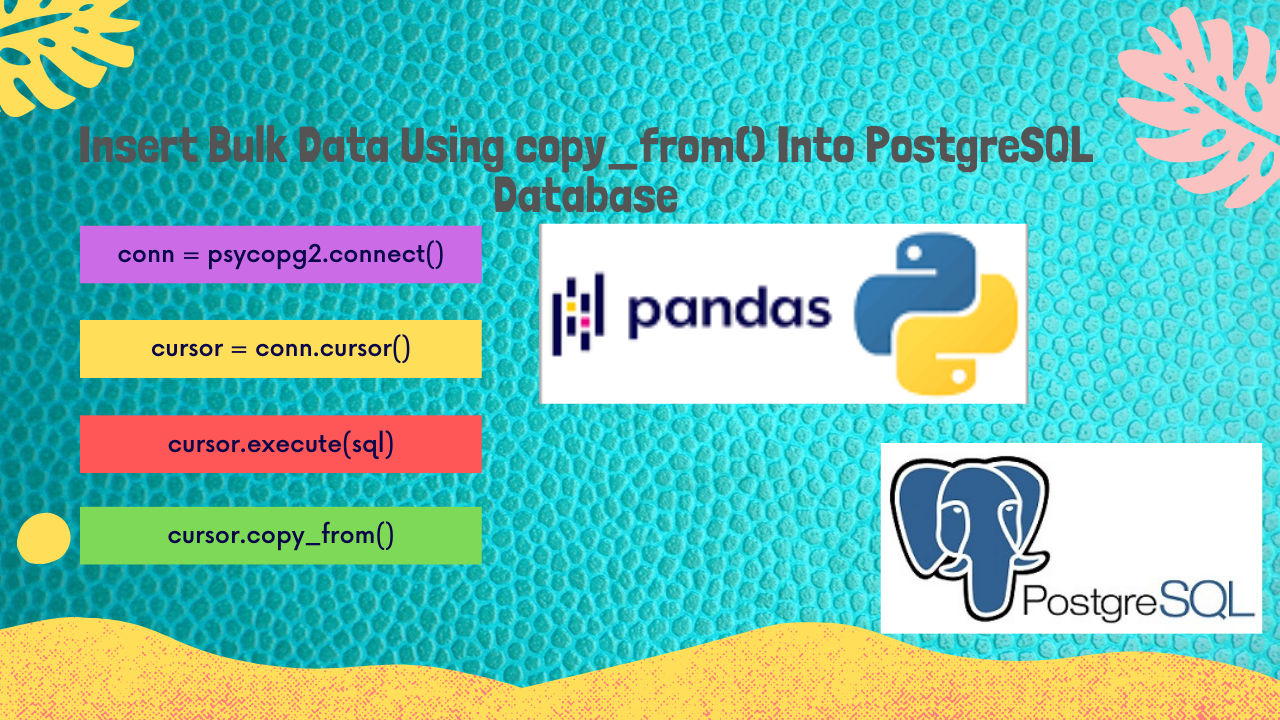

<h3>Prerequisites</h3>

<h4>(a) Python 3.8.3 </h4>

[Anaconda download link](https://www.anaconda.com/products/individual)

<h4>(b) PostgreSQL 13</h4>

[Download link](https://www.postgresql.org/download/)

<b>(c) Psycopg2 : </b> To install <b>Psycopg2</b> use the command: <b>pip install psycopg2</b>

<h3>Objective()</h3>

The main objective of this article is to learn step by step working code for the copy_from() method.

<h3>Step 1 : Prepare or identify your data</h3>

To begin, prepare or identify the CSV file that you'd like to import to PostgreSQL database. For example, we loaded iris data from GitHub.

In [17]:
import os
# import sys to get more detailed Python exception info
import sys
# import the connect library for psycopg2
import psycopg2
# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
import pandas as pd
irisData = pd.read_csv('https://raw.githubusercontent.com/Muhd-Shahid/Learn-Python-Data-Access/main/iris.csv',index_col=False)
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h3>Step 2: Specify the connection parameters</h3>

In [6]:
# Note: please change your database, username & password as per your own values

conn_params_dic = {
    "host"      : "localhost",
    "database"  : "irisdb",
    "user"      : "postgres",
    "password"  : "Passw0rd"
}

<h3> Step 3 : Support Functions </h3>

In [34]:
# Define a function that handles and parses psycopg2 exceptions
def show_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()    
    # get the line number when exception occured
    line_n = traceback.tb_lineno    
    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_n)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type) 
    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)    
    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")
    
# Define a connect function for PostgreSQL database server
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successful..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

# Define function using copy_from_dataFile to insert the dataframe.
def copy_from_dataFile(conn, df, table):
    
    #  Here we are going save the dataframe on disk as a csv file, load the csv file and use copy_from() to copy it to the table
    tmp_df = "./Learn Python Data Access/df_temp.csv"
    df.to_csv(tmp_df, header=False,index = False)
    f = open(tmp_df, 'r')
    cursor = conn.cursor()
    try:
        cursor.copy_from(f, table, sep=",")
        conn.commit()
        print("Data inserted using copy_from_datafile() successfully....")
        cursor.close()
    except (Exception, psycopg2.DatabaseError) as error:
        os.remove(tmp_df)
        # pass exception to function
        show_psycopg2_exception(err)
        cursor.close()
    os.remove(tmp_df)

<h3> Step 4 : Perform main task</h3>

In [31]:
# Connect to the database
conn = connect(conn_params_dic)
conn.autocommit = True
# Run the mogrify() method
copy_from_dataFile(conn, irisData, 'irisCopyFromFile')

Connecting to the PostgreSQL...........
Connection successful..................
Data inserted using copy_from_datafile() successfully....


<h3>Step 5: Query the database to check our work</h3>

let's query the database to make sure that our inserted data has been saved correctly.

In [33]:
# Prepare sql query
sql = "SELECT * FROM irisCopyFromFile" 
cursor = conn.cursor()
# Execute cursor
cursor.execute(sql)
# Fetch all the records
tuples = cursor.fetchall()
# list of columns
cols = list(irisData.columns)
irisdf = pd.DataFrame(tuples,columns=cols) 
# Print few records
print(irisdf.head())
# Close the cursor
cursor.close()
# Close the connection
conn.close()

  sepal_length sepal_width petal_length petal_width      species
0          5.1         3.5          1.4         0.2  setosa     
1          4.9         3.0          1.4         0.2  setosa     
2          4.7         3.2          1.3         0.2  setosa     
3          4.6         3.1          1.5         0.2  setosa     
4          5.0         3.6          1.4         0.2  setosa     


<b>Conclusion : </b> This ends our Part 3.5. In this tutorial we have learned how to insert bulk data into PostgreSQL database using <b>copy_from()</b> method.

<b>Stay Positive !! Stay Safe !! Keep Learning :):)

<h3>Thanks you for reading!!</h3>